# **RECOMMENDATION SYSTEM**



In [2]:
!pip install surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 12.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp311-cp311-linux_x86_64.whl size=2505173 sha256=54eb9514d116e0153eef4d01a6f145eef4c9f4e8001f072273bdc17717dc768b
  Stored in directory: /root/.cache/pip/wheels/2a/8f/6e/7e2899163e2d85d8266daab4aa1cdabec7a6c56f83c015b5af
Successfully built scikit-surprise


**Installing requried packages from libraries**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from surprise import Dataset, Reader, SVD, accuracy
from surprise.model_selection import train_test_split


**Loading the dataset**

In [11]:
data = Dataset.load_builtin('ml-100k')
title_data = pd.read_csv('http://files.grouplens.org/datasets/movielens/ml-100k/u.item', sep='|', encoding='latin-1', header=None, usecols=[0, 1], names=['movie_id', 'title'])
title_mapping = dict(zip(title_data['movie_id'].astype(str), title_data['title']))

**Splitting the dataset into train and test**

In [12]:
trainset, testset = train_test_split(data, test_size=0.25)

**Training the Model**

In [14]:
algo = SVD()
algo.fit(trainset)
predictions = algo.test(testset)

**Evaluate the model**

In [15]:
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)

RMSE: 0.9394
MAE:  0.7434


**Function to get top N recommendations for a specific user**


In [22]:
def get_top_n_recommendations(predictions, n=10):
    from collections import defaultdict
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

top_n = get_top_n_recommendations(predictions, n=10)
user_id = '200'
print(f"Top 10 recommendations for User {user_id}:")
for movie_id, rating in top_n[user_id]:
    movie_title = title_mapping.get(movie_id, "Unknown Title")
    print(f"Movie: {movie_title},Predicted Rating: {rating:.2f}")

Top 10 recommendations for User 200:
Movie: Casablanca (1942),Predicted Rating: 5.00
Movie: Schindler's List (1993),Predicted Rating: 4.88
Movie: Aliens (1986),Predicted Rating: 4.66
Movie: Jurassic Park (1993),Predicted Rating: 4.64
Movie: Blade Runner (1982),Predicted Rating: 4.58
Movie: Boot, Das (1981),Predicted Rating: 4.56
Movie: Young Frankenstein (1974),Predicted Rating: 4.55
Movie: Hoop Dreams (1994),Predicted Rating: 4.53
Movie: Snow White and the Seven Dwarfs (1937),Predicted Rating: 4.52
Movie: Eat Drink Man Woman (1994),Predicted Rating: 4.52


**Plotting the distribution of predicted ratings**

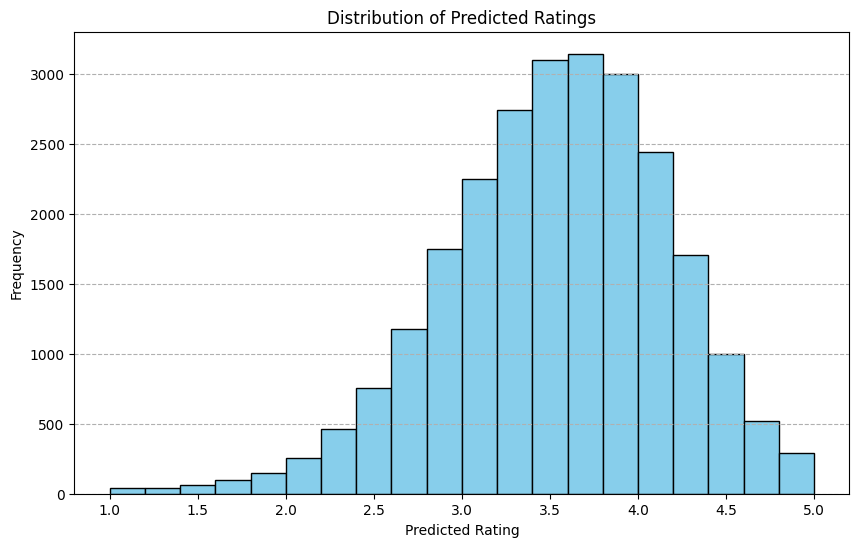

In [20]:
predicted_ratings = [pred.est for pred in predictions]
plt.figure(figsize=(10, 6))
plt.hist(predicted_ratings, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Predicted Ratings')
plt.xlabel('Predicted Rating')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--')
plt.show()
